In [2]:
import sacpy as scp
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sst = xr.open_dataset("../DATA/HadISST_sst_2x2.nc")['sst']
sst = xr.where(np.abs(sst)>100,np.NAN,sst)
ssta = sst.groupby("time.month") - sst.groupby("time.month").mean()
sstas = ssta.loc[:,-30:30,120:280]


In [4]:
eof = scp.EOF(sstas)
eof.solve()

In [5]:
pc = eof.get_pc(npt=3)
pt = eof.get_pt(npt=3)

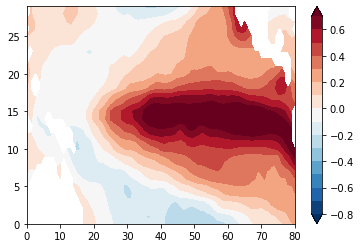

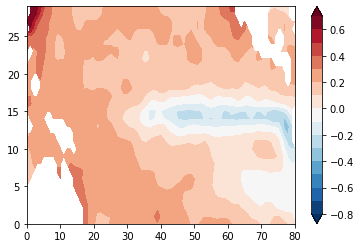

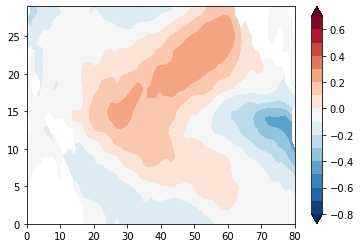

In [11]:
for i in range(3):
    plt.contourf(pt[i],cmap="RdBu_r",levels=np.arange(-0.8,0.8,0.1),extend="both")
    plt.colorbar()
    plt.show()

Text(0.5, 1.0, 'PC')

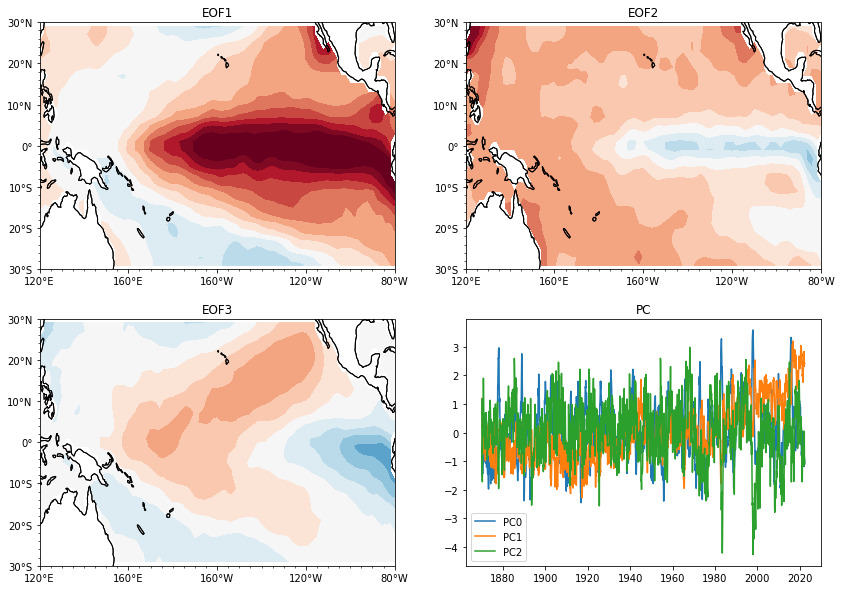

In [20]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
fig = plt.figure(figsize=[14,10])
x = sstas.lon
y = sstas.lat
for i in range(3):
    ax = fig.add_subplot(2,2,i+1,projection=ccrs.PlateCarree(central_longitude=180))
    ax.contourf(x,y,pt[i],cmap="RdBu_r",levels=np.arange(-0.8,0.8,0.1),extend="both",transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.coastlines()
    ax.set_aspect("auto") # 回复原大小
    xticks = np.arange(120,281,40)
    yticks = np.arange(-30,31,10)
    smallx = 5
    smally = 2

    # copy
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.xaxis.set_minor_locator(MultipleLocator(smallx))
    ax.yaxis.set_minor_locator(MultipleLocator(smally))
    ax.set_title(f"EOF{i+1}")
ax4 = fig.add_subplot(2,2,4)
for i in range(3):
    ax4.plot(sstas.time,pc[i],label=f"PC{i}")
ax4.legend()
ax4.set_title("PC")